# Trying to figure out what is happening

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lacbox.io import ReadHAWC2

fname = '../res/BB_redesign_C1.hdf5'
h2res = ReadHAWC2(fname)

In [3]:
h2res.__dict__.keys()

dict_keys(['fname', 'data', 'chaninfo', 'nrch', 'nrsc', 'freq', 'fformat', 't', 'gtsdf_description'])

In [15]:
names, units, desc = h2res.chaninfo
print('There are', len(names), 'channels in this output file.')

for name, unit, des in zip(names, units, desc):
    print(f'{name} \t [{unit}] \t\t\t {des}')

There are 113 channels in this output file.
Time 	 [s] 			 Time
bea1 angle 	 [deg] 			 shaft_rot angle
bea1 angle_speed 	 [rpm] 			 shaft_rot angle speed
bea2 angle 	 [deg] 			 pitch1 angle
bea2 angle_speed 	 [deg/s] 			 pitch1 angle speed
bea2 angle 	 [deg] 			 pitch2 angle
bea2 angle_speed 	 [deg/s] 			 pitch2 angle speed
bea2 angle 	 [deg] 			 pitch3 angle
bea2 angle_speed 	 [deg/s] 			 pitch3 angle speed
Omega 	 [rad/s] 			 Rotor speed
Ae rot. torque 	 [kNm] 			 Aero rotor torque
Ae rot. power 	 [kW] 			 Aero rotor power
Ae rot. thrust 	 [kN] 			 Aero rotor thrust
WSP gl. coo.,Vx 	 [m/s] 			 Free wind speed Vx, gl. coo, of gl. pos    0.00,   0.00,-119.00
WSP gl. coo.,Vy 	 [m/s] 			 Free wind speed Vy, gl. coo, of gl. pos    0.00,   0.00,-119.00
WSP gl. coo.,Vz 	 [m/s] 			 Free wind speed Vz, gl. coo, of gl. pos    0.00,   0.00,-119.00
WSP gl. coo.,Abs_vhor 	 [m/s] 			 Free wind speed Abs_vhor, gl. coo, of gl. pos    0.00,   0.00,-119.00
WSP gl. coo.,Vdir_hor 	 [deg] 			 Free wind s

In [5]:
# find the indices that we think correspond to flapwise blade moment
idx_blades = np.where(['Mx coo: blade' in name for name in names])[0]
print('Identified indices of blade channels are', idx_blades)

# print the corresponding description
[print(desc[i]) for i in idx_blades]

# print the coresponding units
[print(units[i]) for i in idx_blades]

Identified indices of blade channels are [36 39 42]
MomentMx Mbdy:blade1 nodenr:   1 coo: blade1  blade1 root flped
MomentMx Mbdy:blade2 nodenr:   1 coo: blade2  blade2 root flped
MomentMx Mbdy:blade3 nodenr:   1 coo: blade3  blade3 root flped
kNm
kNm
kNm


[None, None, None]

Mean values:
-14671.637400899697
-14661.895082527331
-14666.75397701404


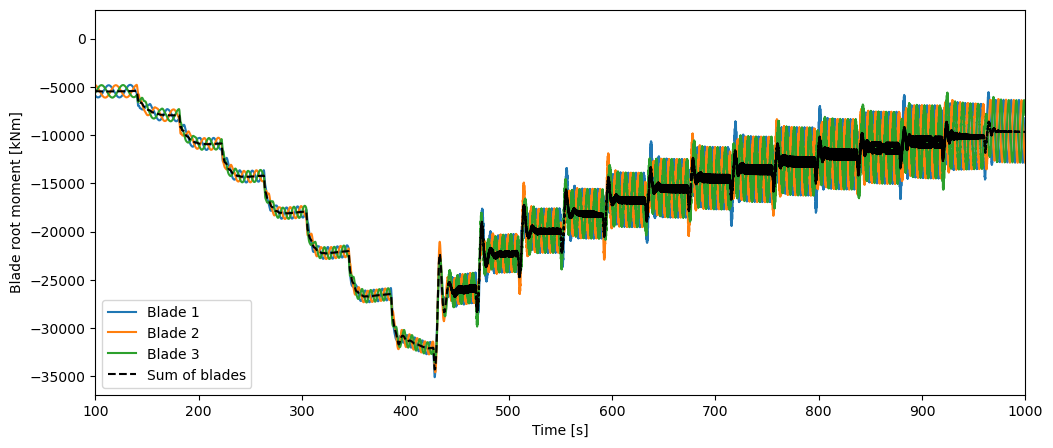

In [8]:
# assign the relevant data to variables for convenience
Mx1, Mx2, Mx3 = h2res.data[:, idx_blades].T

# calculate statistics
print('Mean values:')
[print(Mx.mean()) for Mx in [Mx1, Mx2, Mx3]]
Mx_mean = h2res.data[:, idx_blades].mean(axis=1)

# plot the time series
fig, ax = plt.subplots(figsize=(12, 5))
handles = ax.plot(h2res.t, h2res.data[:, idx_blades])
l, = ax.plot(h2res.t, Mx_mean, 'k--')
labels = [f'Blade {i+1}' for i in range(3)] + ['Sum of blades']
ax.set(xlim=[100, 1000],
      xlabel='Time [s]',
      ylabel='Blade root moment [kNm]')
ax.legend(handles + [l], labels)

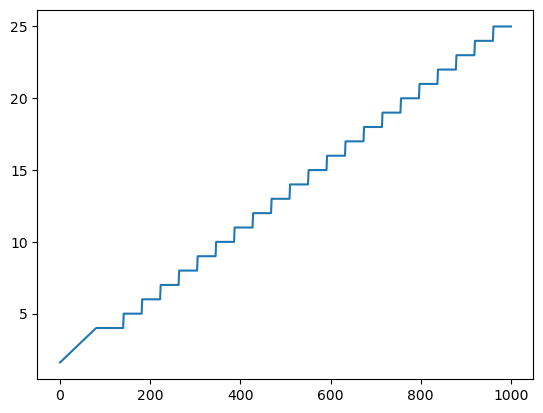

In [23]:
idx = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
plt.plot(h2res.t, h2res.data[:, idx])

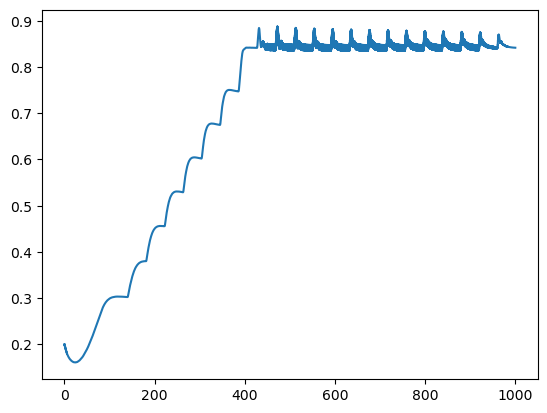

In [20]:
idx = np.where(['Omega' in name for name in names])[0]
plt.plot(h2res.t, h2res.data[:, idx])

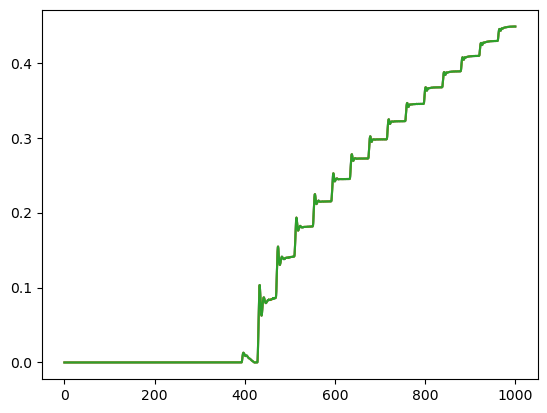

In [25]:
pitch_1_idx = np.where(['DLL inp   4:   1' in name for name in names])[0]
pitch_2_idx = np.where(['DLL inp   4:   2' in name for name in names])[0]
pitch_3_idx = np.where(['DLL inp   4:   3' in name for name in names])[0]
plt.plot(h2res.t, h2res.data[:, pitch_1_idx])
plt.plot(h2res.t, h2res.data[:, pitch_2_idx])
plt.plot(h2res.t, h2res.data[:, pitch_3_idx])

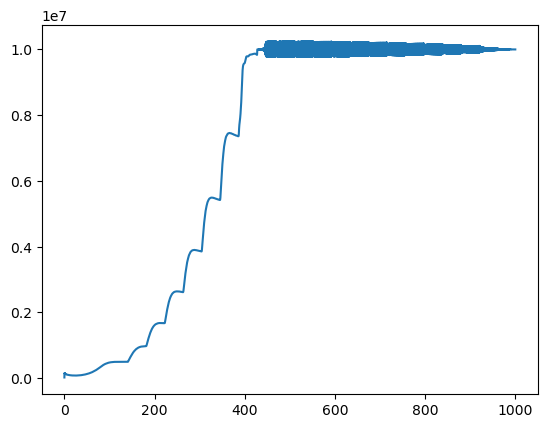

In [26]:
idx = np.where(['DLL inp   2:   2' in name for name in names])[0]
plt.plot(h2res.t, h2res.data[:, idx])

# Combination

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from lacbox.io import ReadHAWC2
import matplotlib
import scienceplots


matplotlib.rcParams.update(matplotlib.rcParamsDefault) # TO RESET  PLOTS
plt.style.use(['science'])

# Set global font properties
plt.rcParams['legend.frameon'] = True  # Enable the legend frame
plt.rcParams['legend.fancybox'] = False  # No fancybox, just a regular box
plt.rcParams['legend.edgecolor'] = 'black'  # Black edge color
plt.rcParams['legend.framealpha'] = 1  # No transparency
plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 'normal'



# List of file names (adjust the paths as necessary)
file_names = [
    '../res/BB_redesign_C1.hdf5',
    '../res/BB_redesign_C2.hdf5',
    '../res/BB_redesign_C3.hdf5'
]
labels = ['C1', 'C2', 'C3']

# Initialize lists to store variables
wsp_data = []
omega_data = []
pitch_data = []
pelec_data = []
time_data = []

# Loop through all files to read the data and get the relevant indices
for fname in file_names:
    # h2res_data, h2res_chaninfo, h2res_time = ReadHAWC2(fname)
    # names, _, _ = h2res_chaninfo

    h2res = ReadHAWC2(fname)
    names, _, _ = h2res.chaninfo

    # Extract indexes based on names
    wsp_idx = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    omega_idx = np.where(['Omega' in name for name in names])[0]
    pitch_idx = np.where(['DLL inp   4:   1' in name for name in names])[0]
    pelec_idx = np.where(['DLL inp   2:   2' in name for name in names])[0]
    
    # Append relevant data for each variable
    wsp_data.append(h2res.data[:, wsp_idx])
    omega_data.append(h2res.data[:, omega_idx] * 60/(2*np.pi))
    pitch_data.append(h2res.data[:, pitch_idx] * 180/np.pi)
    pelec_data.append(h2res.data[:, pelec_idx] / 1e6)
    time_data.append(h2res.t)

# Create subplots with shared x-axis
fig, axs = plt.subplots(4, 1, sharex='all', figsize=(9, 9))

# Plot WSP on the first subplot
# for wsp, t in zip(wsp_data, time_data):
axs[0].plot(time_data[0], wsp_data[0], 'k')
axs[0].set_ylabel(r'$U$ [m/s]')
axs[0].set_xlim(left=100)
axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Omega on the second subplot
for omega, t in zip(omega_data, time_data):
    axs[1].plot(t, omega)
axs[1].set_ylabel(r'$\omega$ [RPM]')
axs[1].set_xlim(left=100)
axs[1].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Pitch on the third subplot
for pitch, t in zip(pitch_data, time_data):
    axs[2].plot(t, pitch)
axs[2].set_ylabel(r'$\theta$ [deg]')
axs[2].set_xlim(left=100)
axs[2].grid(linestyle='--', linewidth=0.5, alpha=0.7)


# Plot P_elec on the fourth subplot
for pelec, t in zip(pelec_data, time_data):
    axs[3].plot(t, pelec)
axs[3].set_ylabel(r'$P_{el}$ [MW]')
axs[3].set_xlim(left=100)
axs[3].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Legend
legend = axs[2].legend(labels=labels, fancybox=False, edgecolor="black", fontsize=12, loc='upper left')
legend.get_frame().set_linewidth(0.5)

# Set common labels
plt.xlabel('Time [s]')
plt.savefig('part_3_c1c2c3.pdf', dpi=300, bbox_inches='tight')

# C4-C6

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from lacbox.io import ReadHAWC2
import matplotlib
import scienceplots


matplotlib.rcParams.update(matplotlib.rcParamsDefault) # TO RESET  PLOTS
plt.style.use(['science'])

# Set global font properties
plt.rcParams['legend.frameon'] = True  # Enable the legend frame
plt.rcParams['legend.fancybox'] = False  # No fancybox, just a regular box
plt.rcParams['legend.edgecolor'] = 'black'  # Black edge color
plt.rcParams['legend.framealpha'] = 1  # No transparency
plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 'normal'



# List of file names (adjust the paths as necessary)
file_names = [
    '../res/BB_redesign_step_wind_C4.hdf5',
    '../res/BB_redesign_step_wind_C5.hdf5',
    '../res/BB_redesign_step_wind_C6.hdf5'
]
labels = ['C4', 'C5', 'C6']

# Initialize lists to store variables
wsp_data = []
omega_data = []
pitch_data = []
pelec_data = []
time_data = []

# Loop through all files to read the data and get the relevant indices
for fname in file_names:
    # h2res_data, h2res_chaninfo, h2res_time = ReadHAWC2(fname)
    # names, _, _ = h2res_chaninfo

    h2res = ReadHAWC2(fname)
    names, _, _ = h2res.chaninfo

    # Extract indexes based on names
    wsp_idx = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    omega_idx = np.where(['Omega' in name for name in names])[0]
    pitch_idx = np.where(['DLL inp   4:   1' in name for name in names])[0]
    pelec_idx = np.where(['DLL inp   2:   2' in name for name in names])[0]
    
    # Append relevant data for each variable
    wsp_data.append(h2res.data[:, wsp_idx])
    omega_data.append(h2res.data[:, omega_idx] * 60/(2*np.pi))
    pitch_data.append(h2res.data[:, pitch_idx] * 180/np.pi)
    pelec_data.append(h2res.data[:, pelec_idx] / 1e6)
    time_data.append(h2res.t)

# Create subplots with shared x-axis
fig, axs = plt.subplots(4, 1, sharex='all', figsize=(9, 9))

# Plot WSP on the first subplot
# for wsp, t in zip(wsp_data, time_data):
axs[0].plot(time_data[0], wsp_data[0], 'k')
axs[0].set_ylabel(r'$U$ [m/s]')
axs[0].set_xlim(left=100)
axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Omega on the second subplot
for omega, t in zip(omega_data, time_data):
    axs[1].plot(t, omega)
axs[1].set_ylabel(r'$\omega$ [RPM]')
axs[1].set_xlim(left=100)
axs[1].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Pitch on the third subplot
for pitch, t in zip(pitch_data, time_data):
    axs[2].plot(t, pitch)
axs[2].set_ylabel(r'$\theta$ [deg]')
axs[2].set_xlim(left=100)
axs[2].grid(linestyle='--', linewidth=0.5, alpha=0.7)


# Plot P_elec on the fourth subplot
for pelec, t in zip(pelec_data, time_data):
    axs[3].plot(t, pelec)
axs[3].set_ylabel(r'$P_{el}$ [MW]')
axs[3].set_xlim(left=100)
axs[3].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Legend
legend = axs[2].legend(labels=labels, fancybox=False, edgecolor="black", fontsize=12, loc='upper left')
legend.get_frame().set_linewidth(0.5)

# Set common labels
plt.xlabel('Time [s]')
plt.savefig('part_3_c4c5c6.pdf', dpi=300, bbox_inches='tight')

# For C7 Investigation

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from lacbox.io import ReadHAWC2
import matplotlib
import scienceplots


matplotlib.rcParams.update(matplotlib.rcParamsDefault) # TO RESET  PLOTS
plt.style.use(['science'])

# Set global font properties
plt.rcParams['legend.frameon'] = True  # Enable the legend frame
plt.rcParams['legend.fancybox'] = False  # No fancybox, just a regular box
plt.rcParams['legend.edgecolor'] = 'black'  # Black edge color
plt.rcParams['legend.framealpha'] = 1  # No transparency
plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 'normal'



# List of file names (adjust the paths as necessary)
file_names = [
    '../res/BB_redesign_C2.hdf5',
    '../res/BB_redesign_C1.hdf5',
    '../res/BB_redesign_C3.hdf5'
]
labels = ['C2=0.01', 'C1=0.05', 'C3=0.10']
savename = 'part_3_c1c2.pdf'

# Initialize lists to store variables
wsp_data = []
omega_data = []
pitch_data = []
pelec_data = []
time_data = []

# Loop through all files to read the data and get the relevant indices
for fname in file_names:
    # h2res_data, h2res_chaninfo, h2res_time = ReadHAWC2(fname)
    # names, _, _ = h2res_chaninfo

    h2res = ReadHAWC2(fname)
    names, _, _ = h2res.chaninfo

    # Extract indexes based on names
    wsp_idx = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    omega_idx = np.where(['Omega' in name for name in names])[0]
    pitch_idx = np.where(['DLL inp   4:   1' in name for name in names])[0]
    pelec_idx = np.where(['DLL inp   2:   2' in name for name in names])[0]
    
    # Append relevant data for each variable
    wsp_data.append(h2res.data[:, wsp_idx])
    omega_data.append(h2res.data[:, omega_idx] * 60/(2*np.pi))
    pitch_data.append(h2res.data[:, pitch_idx] * 180/np.pi)
    pelec_data.append(h2res.data[:, pelec_idx] / 1e6)
    time_data.append(h2res.t)

# Create subplots with shared x-axis
fig, axs = plt.subplots(2, 1, sharex='all', figsize=(9, 9))

# Plot WSP on the first subplot
# for wsp, t in zip(wsp_data, time_data):
# axs[0].plot(time_data[0], wsp_data[0], 'k')
# axs[0].set_ylabel(r'$U$ [m/s]')
# axs[0].set_xlim(left=100)
# axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Omega on the second subplot
for omega, t in zip(omega_data, time_data):
    axs[0].plot(t, omega)
axs[0].set_ylabel(r'$\omega$ [RPM]')
axs[0].set_xlim(left=427, right=468)
axs[0].set_ylim(7, 10)
axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Pitch on the third subplot
for pitch, t in zip(pitch_data, time_data):
    axs[1].plot(t, pitch)
axs[1].set_ylabel(r'$\theta$ [deg]')
axs[1].set_xlim(left=427, right=468)
axs[1].set_ylim(0, 10)
axs[1].grid(linestyle='--', linewidth=0.5, alpha=0.7)


# # Plot P_elec on the fourth subplot
# for pelec, t in zip(pelec_data, time_data):
#     axs[3].plot(t, pelec)
# axs[3].set_ylabel(r'$P_{el}$ [MW]')
# axs[3].set_xlim(left=100)
# axs[3].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Legend
legend = axs[1].legend(labels=labels, fancybox=False, edgecolor="black", fontsize=12, loc='upper left')
legend.get_frame().set_linewidth(0.5)

# Set common labels
plt.xlabel('Time [s]')
plt.savefig(savename, dpi=300, bbox_inches='tight')

# C1 vs C7

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from lacbox.io import ReadHAWC2
import matplotlib
import scienceplots


matplotlib.rcParams.update(matplotlib.rcParamsDefault) # TO RESET  PLOTS
plt.style.use(['science'])

# Set global font properties
plt.rcParams['legend.frameon'] = True  # Enable the legend frame
plt.rcParams['legend.fancybox'] = False  # No fancybox, just a regular box
plt.rcParams['legend.edgecolor'] = 'black'  # Black edge color
plt.rcParams['legend.framealpha'] = 1  # No transparency
plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 'normal'



# List of file names (adjust the paths as necessary)
file_names = [
    '../res/BB_redesign_C1.hdf5',
    '../res/BB_redesign_step_wind_C7_0.05_0.8.hdf5',
    '../res/BB_redesign_step_wind_C7_0.06_0.7.hdf5',
    '../res/BB_redesign_step_wind_C7_0.06_0.8.hdf5',
]
labels = [r'$\omega=0.05$, $\zeta=0.7$',
          r'$\omega=0.05$, $\zeta=0.8$',
          r'$\omega=0.06$, $\zeta=0.7$',
          r'$\omega=0.06$, $\zeta=0.8$'
          ]

savename = 'part_3_c1c7.pdf'

# Initialize lists to store variables
wsp_data = []
omega_data = []
pitch_data = []
pelec_data = []
time_data = []

# Loop through all files to read the data and get the relevant indices
for fname in file_names:
    # h2res_data, h2res_chaninfo, h2res_time = ReadHAWC2(fname)
    # names, _, _ = h2res_chaninfo

    h2res = ReadHAWC2(fname)
    names, _, _ = h2res.chaninfo

    # Extract indexes based on names
    wsp_idx = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    omega_idx = np.where(['Omega' in name for name in names])[0]
    pitch_idx = np.where(['DLL inp   4:   1' in name for name in names])[0]
    pelec_idx = np.where(['DLL inp   2:   2' in name for name in names])[0]
    
    # Append relevant data for each variable
    wsp_data.append(h2res.data[:, wsp_idx])
    omega_data.append(h2res.data[:, omega_idx] * 60/(2*np.pi))
    pitch_data.append(h2res.data[:, pitch_idx] * 180/np.pi)
    pelec_data.append(h2res.data[:, pelec_idx] / 1e6)
    time_data.append(h2res.t)

# Create subplots with shared x-axis
fig, axs = plt.subplots(2, 1, sharex='all', figsize=(9, 9))

# Plot WSP on the first subplot
# for wsp, t in zip(wsp_data, time_data):
# axs[0].plot(time_data[0], wsp_data[0], 'k')
# axs[0].set_ylabel(r'$U$ [m/s]')
# axs[0].set_xlim(left=100)
# axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Omega on the second subplot
for omega, t in zip(omega_data, time_data):
    axs[0].plot(t, omega)
axs[0].set_ylabel(r'$\omega$ [RPM]')
axs[0].set_xlim(left=427, right=468)
axs[0].set_ylim(7, 10)
axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Pitch on the third subplot
for pitch, t in zip(pitch_data, time_data):
    axs[1].plot(t, pitch)
axs[1].set_ylabel(r'$\theta$ [deg]')
axs[1].set_xlim(left=427, right=468)
axs[1].set_ylim(0, 10)
axs[1].grid(linestyle='--', linewidth=0.5, alpha=0.7)


# # Plot P_elec on the fourth subplot
# for pelec, t in zip(pelec_data, time_data):
#     axs[3].plot(t, pelec)
# axs[3].set_ylabel(r'$P_{el}$ [MW]')
# axs[3].set_xlim(left=100)
# axs[3].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Legend
legend = axs[1].legend(labels=labels, fancybox=False, edgecolor="black", fontsize=12, loc='upper left')
legend.get_frame().set_linewidth(0.5)

# Set common labels
plt.xlabel('Time [s]')
plt.savefig(savename, dpi=300, bbox_inches='tight')